# 作業

以正確的副檔名下載網頁中的圖片
範例網頁:https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html

Note：因為 PTT 會詢問「是否滿 18 歲」，這邊可以用 cookies 繞過

`requests.get(URL, cookies={'over18': '1'}`


In [4]:
import requests
import os

from bs4 import BeautifulSoup
from PIL import Image

In [5]:
url = 'https://www.ptt.cc/bbs/Beauty/M.1556291059.A.75A.html'
resp = requests.get(url, cookies={'over18': '1'})
soup = BeautifulSoup(resp.text)

Save image downloads/Cgb5oo1.jpeg


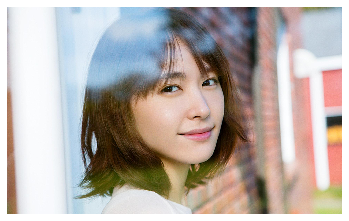

Save image downloads/MgjHY4f.jpeg


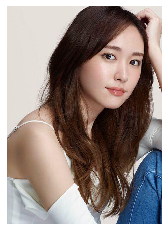

Save image downloads/yeoRtAs.jpeg


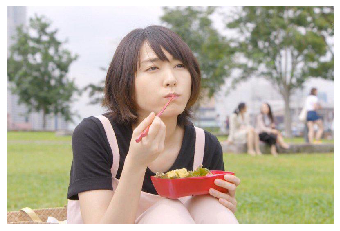

Save image downloads/wsauNEW.jpeg


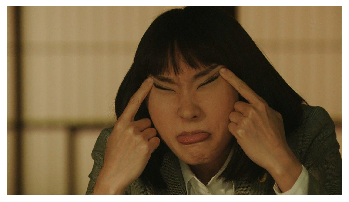

Save image downloads/IjiETcs.jpeg


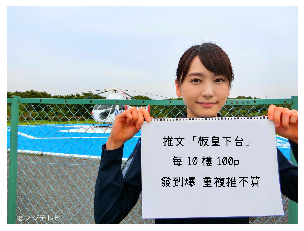

<Figure size 432x288 with 0 Axes>

In [36]:
# 決定要儲存的資料夾
output_dir = 'downloads'

# 假如資料夾不存在就新增一個資料夾
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 定位所有圖片的 tag
# 另法：image_tags = soup.find_all("div", class_="richcontent")
image_tags = soup.find(id='main-content').findChildren('a', recursive=False)
for img_tag in image_tags:
    # 另法：if 'imgur' not in img_tag.a['href']:
    if 'imgur' not in img_tag['href']:
        continue
    # 另法：img_id = img_tag.a['href'].split('/')[-1]
    img_id = img_tag['href'].split('/')[-1]
    img_url = 'https://i.imgur.com/{}.jpg'.format(img_id)
    with requests.get(img_url, stream=True) as r:
        r.raise_for_status()
        img = Image.open(r.raw)
        img_savename = '{outdir}/{img_id}.{img_ext}'.format(outdir=output_dir, img_id=img_id, img_ext=img.format.lower())
        img.save(img_savename)
        print('Save image {}'.format(img_savename))
        # 讀取圖片
        %matplotlib inline
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg
        img = mpimg.imread(img_savename)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        plt.clf()